### Read in the main data file

In [2]:
import pandas as pd
df_sat_act=pd.read_csv('act_sat_merged.csv')
df_sat_act.head()

,State,SAT_P,SAT_RW,SAT_M,SAT_T,ACT_P,ACT_E,ACT_M,ACT_R,ACT_S,ACT_C
0,Oregon,43,560,548,1108,40,21.2,21.5,22.4,21.7,21.8
1,California,53,531,524,1055,31,22.5,22.7,23.1,22.2,22.8
2,Vermont,60,562,551,1114,29,23.3,23.1,24.4,23.2,23.6
3,Georgia,61,535,515,1050,55,21.0,20.9,22.0,21.3,21.4
4,Arizona,30,563,553,1116,62,18.6,19.8,20.1,19.8,19.7


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text yticklabel objects>)

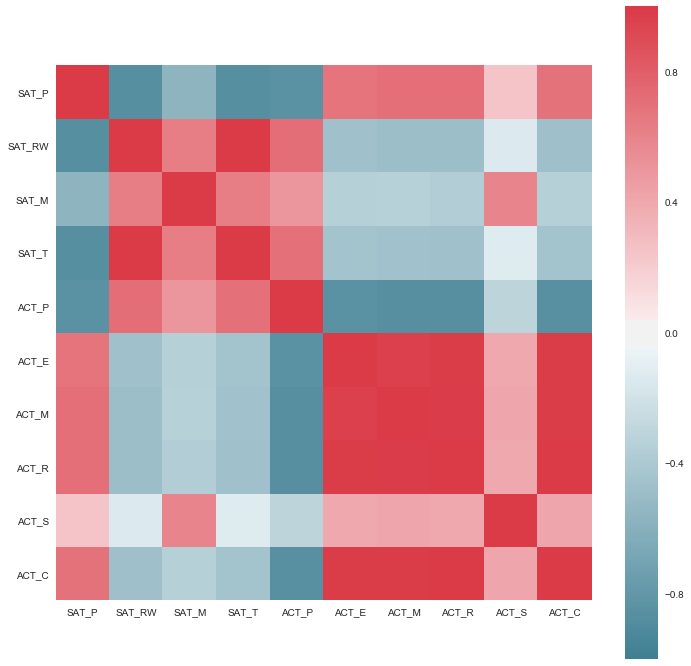

In [9]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as pl
f, ax = pl.subplots(figsize=(12, 12))
corr = df_sat_act[['SAT_P','SAT_RW','SAT_M','SAT_T','ACT_P','ACT_E',"ACT_M","ACT_R","ACT_S","ACT_C"]].corr()

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
pl.yticks(rotation=0)

#### In the heatmap above, there are some interesting correlations. 
#### - SAT_M and ACT_M (SAT and ACT math) are negatively correlated 
#### - SAT_RW and ACT_R (SAT reading and writing; ACT reading) are negatively correlated
#### The SAT_M and the ACT_M should be measuring similar skill sets. We also should expect SAT_RW to be measuring the same skills that ACT_R measures. The negative correlations imply the opposite. Based on the correlations, we might conclude that the ability to do the math on the SAT hinders ones ability to do the math on the ACT. That seems a bit absurd. What is wrong?  


In [17]:
print(df_sat_act[['SAT_M','ACT_M']].head(20))

    SAT_M  ACT_M
0     548   21.5
1     524   22.7
2     551   23.1
3     515   20.9
4     553   19.8
5     507   20.7
6     532   22.4
7     534   21.9
8     533   19.8
9     531   23.4
10    541   23.3
11    561   19.4
12    635   21.3
13    523   24.0
14    520   23.1
15    528   19.4
16    526   23.8
17    524   23.3
18    628   21.3
19    570   21.6


-0.84


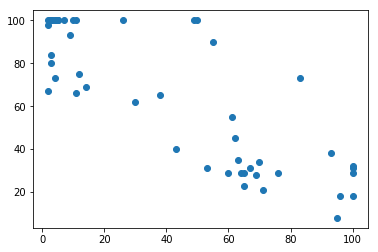

In [21]:
import matplotlib.pyplot as plt
import numpy as np
def t_normalize(tDf,t_column):
    tr=tDf[t_column]-tDf[t_column].mean()
    tr=tr/tr.std()
    return tr

plt.scatter(df_sat_act['SAT_P'],df_sat_act['ACT_P'])
print(np.around(np.corrcoef(df_sat_act['SAT_P'],df_sat_act['ACT_P'])[0,1],2))
plt.show()

#### Above we have a scatter plot and the numeric correlation for the SAT/ACT participation rates. The are negatively correlated. States usually have a single required test. For any given state, they require the SAT or the ACT, but never both. In states that require the SAT, highly motivated students will take both tests. There are a smaller number of these type of students compared to the overall student population. In states that require the SAT, the ACT participation rate will be smaller than the rate for the SAT. This is flipped in states that require the ACT. This is where the negative correlation comes from.  

-0.45


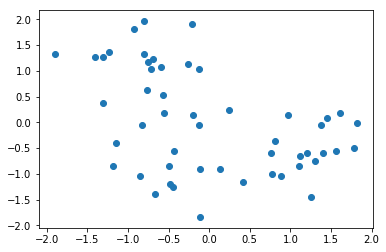

In [22]:
import matplotlib.pyplot as plt
import numpy as np
def t_normalize(tDf,t_column):
    tr=tDf[t_column]-tDf[t_column].mean()
    tr=tr/tr.std()
    return tr

t_norm_sat_m=t_normalize(df_sat_act,'SAT_T')
t_norm_act_m=t_normalize(df_sat_act,'ACT_C')
plt.scatter(t_norm_sat_m,t_norm_act_m)
print(np.around(np.corrcoef(t_norm_sat_m,t_norm_act_m)[0,1],2))
plt.show()

#### Above we have a scatter plot and the numeric correlation for the SAT/ACT aggregate scores. The are negatively correlated. This is directly related to the negative correlation with the participation rates.  In states that require the SAT, the students who also take the ACT are the most motivated and therefore better students. These students excel on the ACT. When the SAT is required, a larger portion of students take the test. This brings in a wider range of student ability/knowledge which leads to a lower average score. When the participation rate is high (i.e. the test is required), the average score drops. When the participation rate is low (i.e. the test is not required) the average score goes up. 

#### Is there a way to 'fix' the data? Suppose we create a feature made of only of scores tied to a high participation rate. This means will will have ACT and SAT scores in the same feature. To enable this, we need to adjust the scores such that they are on the same scale. A simple way to do this is normalize. After the nomalization, we perform the following steps using the aggregate data from the SAT and the ACT.
#### - For each state, we choose the score from the test with the highest participation rate
#### - We build a single feature from those scores. Each state will have a single entry
#### - We repeat this process for the math score. (we could have chosen other. We chose math because we assumed math would be the most alike across the set of tests.
#### We get the correlation between the feature built from the aggregates and the math scores. We should get a positive correlation. The code for these steps is below. 

0   -0.186601
1   -0.695285
2   -0.123015
3   -0.886042
4   -0.697457
Name: HI_P_M, dtype: float64   0   -0.195665
1   -0.768671
2   -0.130797
3   -0.822728
4   -0.900486
Name: HI_P_T, dtype: float64
0.9690325018978715


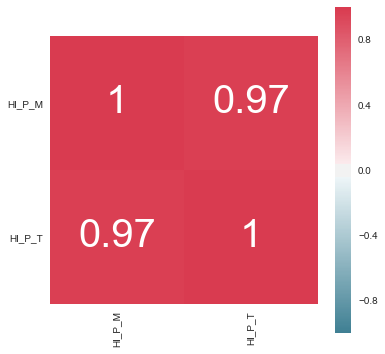

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tFile="act_sat_merged.csv"
df_SAT=pd.read_csv(tFile)
tColList=['SAT_RW','SAT_M','SAT_T','ACT_E','ACT_M','ACT_R','ACT_S','ACT_C']
   
for i in range(0,8):
    df_SAT[tColList[i]]=(df_SAT[tColList[i]]-(df_SAT[tColList[i]].mean()))/df_SAT[tColList[i]].std()
t_switch=list()
for i in range(0,len(df_SAT)):
    t_switch.append(0) 
    if(df_SAT.loc[i,'SAT_P']>df_SAT.loc[i,'ACT_P']):
        t_switch[i]=1
t_switch=pd.Series(t_switch)
df_SAT['t_switch']=t_switch
com_sc=list()
for i in range(0,len(df_SAT)):
    com_sc.append(df_SAT.loc[i,'ACT_C']) 
    if(df_SAT.loc[i,'t_switch']==1):
        com_sc[i]=df_SAT.loc[i,'SAT_T']
com_sc=pd.Series(com_sc)
df_SAT['HI_P_T']=com_sc
com_sc=list()
for i in range(0,len(df_SAT)):
    com_sc.append(df_SAT.loc[i,'ACT_M']) 
    if(df_SAT.loc[i,'t_switch']==1):
        com_sc[i]=df_SAT.loc[i,'SAT_M']

com_sc=pd.Series(com_sc)
df_SAT['HI_P_M']=com_sc

df_SAT.to_csv("act_sat_merged_HI_P_M.csv",index=False)
print(df_SAT["HI_P_M"].head(),' ',df_SAT["HI_P_T"].head())
print(df_SAT["HI_P_M"].corr(df_SAT['HI_P_T']))            
#print(df_SAT)
f, ax = plt.subplots(figsize=(6, 6))
cbar_kws = { 'ticks' : [-1, 1] } 
corr = df_SAT[['HI_P_M','HI_P_T']].corr()
sns.heatmap(corr, cmap=sns.diverging_palette(220, 8, as_cmap=True),
            square=True, ax=ax,center=0,annot=True,annot_kws={"size":40})
plt.yticks(rotation=0)
plt.xticks(rotation=90)                          
plt.show()                

#### - The heatmap above confirms out assumption. 